In [1]:
import pickle
import pandas as pd
import os
from keras.preprocessing import image
from keras.applications import densenet
import numpy as np
import pickle
import re
from scipy.spatial.distance import cosine

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df=pd.read_csv("/content/drive/MyDrive/update_train.csv")

In [23]:
with open('/content/drive/MyDrive/encodings_train.txt', 'rb') as fp:
    encodings_train = pickle.load(fp)
with open('/content/drive/MyDrive/encodings_test.txt', 'rb') as fp:
    encodings_test = pickle.load(fp)
ingredients_train=train_df["RecipeIngredientParts"].tolist()
ingredients_test=test_df["RecipeIngredientParts"].tolist()

In [36]:
new_encodings_train=[]
for i in range(len(encodings_train)):
  a = np.array(encodings_train[i])
  new_encodings_train.append(a)

In [54]:
import Levenshtein

In [73]:
import sys
from PIL import Image
sys.modules['Image'] = Image 
from os import listdir
from PIL import Image as PImag
import pandas as pd
import os
import numpy as np
import sys
from PIL import Image
sys.modules['Image'] = Image 
import pickle
import matplotlib.pyplot as plt


In [74]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16,preprocess_input

In [83]:
def get_encodings(_Image):
    _Image =img_to_array(_Image)
    _Image = np.expand_dims(_Image, axis=0)
    _Image = preprocess_input(_Image)
    encodings = model.predict(_Image)
    return encodings

In [77]:
Recipes=train_df["RecipeInstructions"].tolist()
Ingredients=train_df["RecipeIngredientParts"].tolist()

In [78]:
encodings_train=train_df["encodings"].tolist()

In [82]:
from tensorflow.keras.utils import load_img, img_to_array

In [75]:
model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3), pooling='avg', classes=1000)

58889256/58889256 [==============================] - 1s 0us/step


In [90]:
_Image = load_img("user.jpg", target_size=(256, 256))
encoding_test = get_encodings(_Image)
a = str(encoding_test)
similarity_list=[]
for j in range(len(encodings_train)):
        similarity=cosine(a,str(encodings_train[j]))
        similarity_list.append(similarity)
max_value = max(similarity_list)
max_index = similarity_list.index(max_value)

1/1 [==============================] - 0s 18ms/step


In [94]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Food Image:


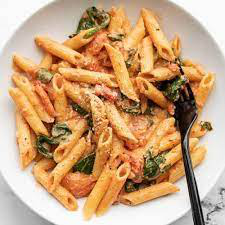

In [99]:
print(color.BOLD+"Food Image:"+color.END)
img = PImag.open("user.jpg")
img


In [100]:
print(color.BOLD+"Recipe Instructions:"+color.END)
new=Recipes[max_index].replace('c(','')
new1=new.replace(')','')
instructions=new1.split('",')
for i in range(len(instructions)):
    output=instructions[i].replace('"','')
    print(str(i+1)+":"+" "+output.rstrip())


Recipe Instructions:
1: Dice the tomatoes and sprinkle with a tiny bit of sea salt and black pepper and a very tiny pinch of sugar - let sit a couple of minutes as you prepare the rest of the ingredients.
2:  In a large bowl, combine the tomatoes, pasta, corn, letttuce, rocket and onion, tossing to combine.
3:  Drizzle in some walnut oil to give everythng just a light coating, mix then add in some vinegar and a splash of Worcestershire sauce.
4:  Season with a pinch of sea salt and pepepr, toss and taste, adding more of any of the dressing ingredients until you are happy with the balance.
5:  
Serve immediately.


In [101]:
print(color.BOLD+"Ingredients required:"+color.END)
new=Ingredients[max_index].replace('c(','')
new1=new.replace(')','')
print(new1)

Ingredients required:
"tomatoes", "sea salt", "black pepper", "sugar", "corn", "red onions", "gem lettuce", "rocket", "olive oil", "apple cider vinegar", "Worcestershire sauce", "sea salt", "sugar", "black pepper"
